In [2]:
from ising import generate_configuration, propagate, Trajectory, filter_trajectories, generate_trajectory_name, plot_configuration
import numpy as np
from matplotlib import pyplot as plt
from multiprocessing import Process

# Simulation

In [3]:
temperatures = np.round(np.arange(0.01, 3.51, 0.01), 2)
J = 1
B = 0
N = 25

def simulate_temperatures(N, J, B, temperatures):
    for temperature in temperatures:
        configuration = generate_configuration(N=N, random=False)
        filename = generate_trajectory_name(N=N, J=J, B=B, temperature=temperature, folder="ising_analysis_traj")
        propagate(configuration=configuration, n_timestep=1000000, n_output=1000, J=J, B=B, temperature=temperature, filename=filename)

processes = 4

# Divide temperatures to simulate in blocks of mostly equal size (+/- 1) according to numbr of processes
n_temps = len(temperatures)
temps_per_block = n_temps//processes
residuals = n_temps%processes
temps = [list(temperatures[i*temps_per_block:(i+1)*temps_per_block]) + ([temperatures[-residuals+i]] if i < residuals and residuals > 0 else []) for i in range(processes)]

procs = []
for i in range(processes):
    proc = Process(target=simulate_temperatures, args=(N, J, B, temps[i]))
    procs.append(proc)
    proc.start()
    print(f"Started process {i+1} of {processes} with {len(temps[i])} temperatures")

for proc in procs:
    proc.join()

Started process 1 of 4 with 88 temperatures
Started process 2 of 4 with 88 temperatures
Started process 3 of 4 with 87 temperatures


Started process 4 of 4 with 87 temperatures


# Analysis

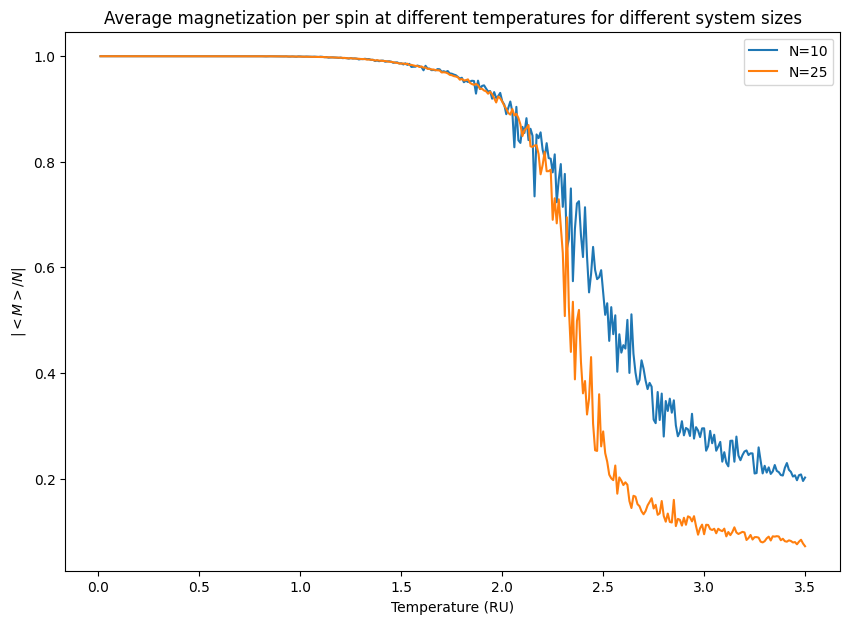

In [4]:
Ns = [10, 25]

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

for N in Ns:

    filtered_trajectories = filter_trajectories(N=N, J=1, B=0, temperature=(0, 3.55), folder="ising_analysis_traj")

    temperatures = []
    magnetizations = []

    for name, params in filtered_trajectories.items():
        temperatures.append(params["temperature"])
        trajectory = Trajectory.from_file(name)
        magnetizations.append(trajectory.magnetization(r_equil=0.2, abs=True, n_blocks=2))

    indices = np.argsort(temperatures)

    ax.plot(np.array(temperatures)[indices], np.array(magnetizations)[indices], label=f"N={N}")

ax.set_title("Average magnetization per spin at different temperatures for different system sizes")
ax.set_xlabel("Temperature (RU)")
ax.set_ylabel("$|<M>/N|$")

ax.legend()

plt.show()